--------------------- GRADIENT BOOSTING REGRESSION -----------------------


Gradient boosting using  squared_error  loss function
MAE: 0.04564
MSE: 0.0042427508283853855
RMSE: 0.06514
R2 score: 0.74749

Gradient boosting using  absolute_error  loss function
MAE: 0.04320
MSE: 0.003945943382481683
RMSE: 0.06282
R2 score: 0.76516

Gradient boosting using  huber  loss function
MAE: 0.04528
MSE: 0.004113650844979144
RMSE: 0.06414
R2 score: 0.75518

Gradient boosting using  quantile  loss function
MAE: 0.06072
MSE: 0.007093498877347183
RMSE: 0.08422
R2 score: 0.57783
For this fold - the best loss function is  absolute_error


Gradient boosting using  squared_error  loss function
MAE: 0.05594
MSE: 0.006252807974302828
RMSE: 0.07907
R2 score: 0.65838

Gradient boosting using  absolute_error  loss function
MAE: 0.05646
MSE: 0.00587875841726394
RMSE: 0.07667
R2 score: 0.67881

Gradient boosting using  huber  loss function
MAE: 0.05652
MSE: 0.006298258987927757
RMSE: 0.07936
R2 score: 0.65589

G

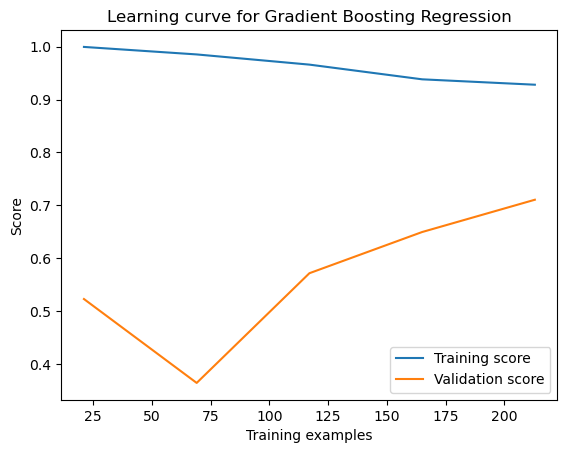

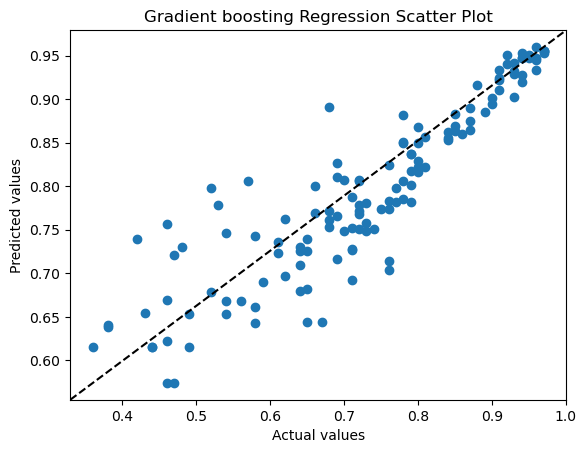

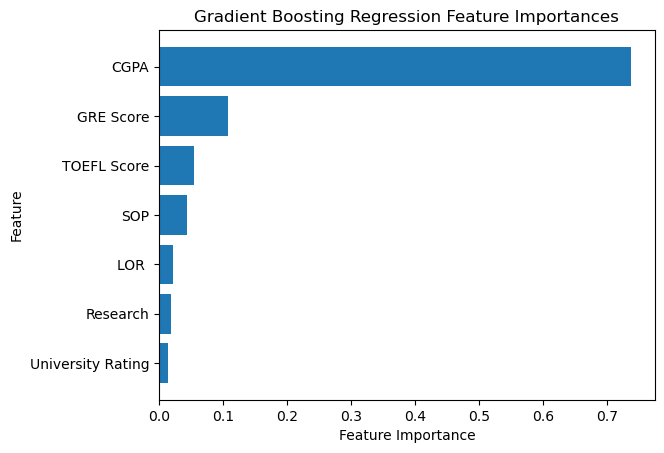

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def Gradient_boosting_skl():
    print("--------------------- GRADIENT BOOSTING REGRESSION -----------------------")
    k = 3
    kf = KFold(n_splits=k, shuffle=True)
    r2_scores=[]
    mse_scores_all=[]
    mse_mat=[]
    data = pd.read_csv('/Users/saiharshithtanguturi/Desktop/Workspacepython/Project/adm_data.csv')
    for train_index, test_index in kf.split(data):

        print()
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        X_train = train_data.iloc[:, :-1].values
        Y_train = train_data.iloc[:, -1].values.ravel()
        X_test = test_data.iloc[:, :-1].values
        Y_test = test_data.iloc[:, -1].values.ravel()

        losses = ['squared_error', 'absolute_error', 'huber', 'quantile']
        r2_scores.clear()
        mse_scores_all.clear()
        for l in losses:

            print()
            print("Gradient boosting using ",l," loss function")
            # Train a Gradient Boosting model
            n_estimators = 100
            learning_rate = 0.1
            max_depth = 3
            model = GradientBoostingRegressor(loss=l,n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
            model.fit(X_train, Y_train)

            train_errors = np.zeros((n_estimators,), dtype=np.float64)
            for i, y_pred in enumerate(model.staged_predict(X_train)):
                train_errors[i] = np.mean((y_pred - Y_train) ** 2)



            Y_pred_ovrall = model.predict(X_test)

            # Compute the metrics
            mae = mean_absolute_error(Y_test, Y_pred_ovrall)
            mse = mean_squared_error(Y_test, Y_pred_ovrall)
            rmse = np.sqrt(mse)
            r2 = r2_score(Y_test, Y_pred_ovrall)
            r2_scores.append(r2)
            # Print the metrics

            print(f"MAE: {mae:.5f}")
            print(f"MSE: {mse}")
            print(f"RMSE: {rmse:.5f}")
            print(f"R2 score: {r2:.5f}")
            

            mse_scores_all.append(mse)

        mse_mat.append(list(mse_scores_all))
 
        bst_r2=max(r2_scores)

        ind = r2_scores.index(bst_r2)

        n_estimators = 100
        learning_rate = 0.1
        max_depth = 3
        print("For this fold - the best loss function is ",losses[ind])
        model = GradientBoostingRegressor(loss=losses[ind],n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
        model.fit(X_train, Y_train)

        train_errors = np.zeros((n_estimators,), dtype=np.float64)
        for i, y_pred in enumerate(model.staged_predict(X_train)):
            train_errors[i] = np.mean((y_pred - Y_train) ** 2)

#  


    print("               ",end="")
    for l in losses: 
        print(l, end="             ")
    print()
    for i in range(len(mse_mat)):
        print(" Fold - ",i+1," ",mse_mat[i])
    avg_mse=[]

    print("\n\nAverage MSE : ")
    for i in range(len(mse_mat[0])):
        s=0
        for j in range(len(mse_mat)):
            s+=mse_mat[j][i]
        s=s/5
        avg_mse.append(s)


    print("               ",end="")
    for l in losses: 
        print(l, end="             ")
    print()
    for m in avg_mse:
        print("        ",m,end="")
    print("\n\n\n")
    
    
    
    
#     train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5)

#     # Plot the learning curve
#     plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
#     plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation score')
#     plt.title('Learning curve for Gradient Boosting Regression')
#     plt.xlabel('Training examples')
#     plt.ylabel('Score')
#     plt.legend()
#     plt.show()
    
    
    
    plt.scatter(Y_test, Y_pred_ovrall)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Gradient boosting Regression Scatter Plot")
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='black', linestyle='--')
    plt.show()


        #Plot the feature importances
    feature_importances = model.feature_importances_
    feature_names = data.columns[:-1]
    sorted_idx = feature_importances.argsort()
    plt.barh(range(len(feature_importances)), feature_importances[sorted_idx])
    plt.yticks(range(len(feature_importances)), feature_names[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Gradient Boosting Regression Feature Importances')
    plt.show()

        
Gradient_boosting_skl()
